In [1]:
import torch
import cv2
import os
import matplotlib.pyplot as plt
import numpy as nps
from pathlib import Path

In [2]:
# Model
#model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom
model = torch.hub.load("ultralytics/yolov5", "custom", "yoloSaltm.pt")  # for objects

Using cache found in /home/emilianh/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-9 Python-3.8.10 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce MX150, 2001MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [3]:
print(torch.cuda.memory_allocated())

180638720


In [4]:
# Images
#img = "data/images/zidane.jpg" # or file, Path, PIL, OpenCV, numpy, list
img = "data/images/home1.jpg"
showimg = cv2.imread(img)

In [5]:
# Inference
results = model(img)

Predicted Sal at [268.5, 728.5, 1051.53, 1849.36, 0.66] with confidence 0.


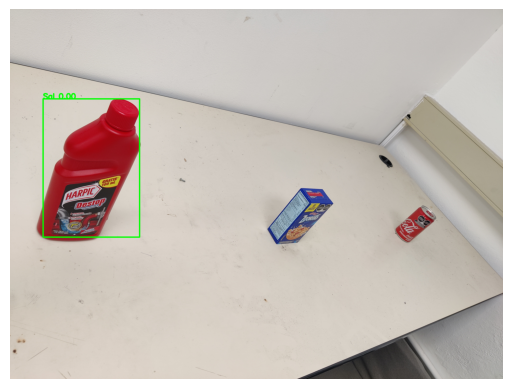

In [6]:
%matplotlib inline
# Results
for *xyxy, conf, cls in results.pandas().xyxy[0].itertuples(index=False):
    print(f"Predicted {cls} at {[round(elem, 2) for elem in xyxy ]} with confidence {conf}.")
    showimg = cv2.rectangle(showimg, (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3])), (0, 255, 0), 10)
    showimg = cv2.putText(showimg, f"{cls} {conf:.2f}", (int(xyxy[0]), int(xyxy[1])), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 10)

# Visualize on matplotlib
plt.imshow(cv2.cvtColor(showimg, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

Predicted Sal at [268.5, 728.5, 1051.53, 1849.36, 0.66] with confidence 0.00.


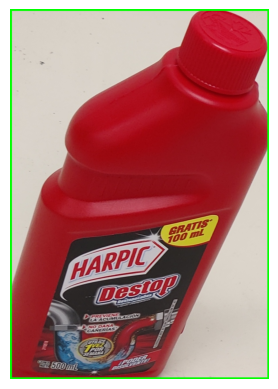

In [7]:
# Crop all figures seen and show individually
for *xyxy, conf, cls in results.pandas().xyxy[0].itertuples(index=False):
    print(f"Predicted {cls} at {[round(elem, 2) for elem in xyxy ]} with confidence {conf:.2f}.")
    crop_img = showimg[int(xyxy[1]):int(xyxy[3]), int(xyxy[0]):int(xyxy[2])]
    plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    plt.axis('off') 
    plt.show()